<a href="https://colab.research.google.com/github/AMMLRepos/acme-insurance/blob/main/ACME_Insurance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
To predict medical insurance changes for a insurance customer 

In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

In [4]:
dataset_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
urlretrieve(dataset_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7f688bb96850>)

In [6]:
medical_df = pd.read_csv("medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Exploratory Data Analysis

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)

In [18]:
fig = px.histogram(
    medical_df, 
    x = "age", 
    marginal = "box",
    nbins = 47,
    title = "Distribution of Age"
)

fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
px.histogram(medical_df, x = "smoker", color = "sex", title = "Smoker vs No Smoker sex wise")

In [23]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

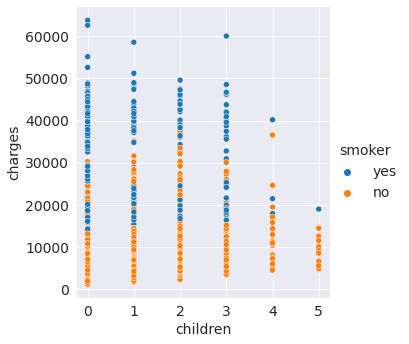

In [27]:
sns.relplot(x = "children", y ="charges", hue = "smoker", data = medical_df);

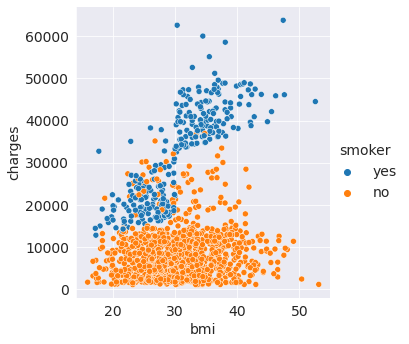

In [26]:
sns.relplot(x = "bmi", y ="charges", hue = "smoker", data = medical_df);

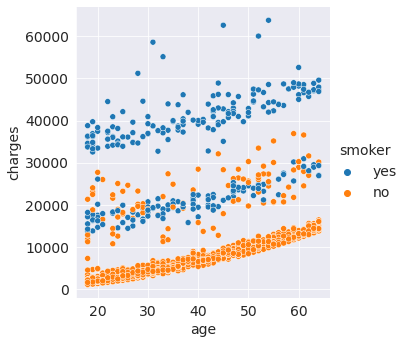

In [25]:
sns.relplot(x = "age", y ="charges", hue = "smoker", data = medical_df);

In [29]:
corr_matrix = medical_df.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


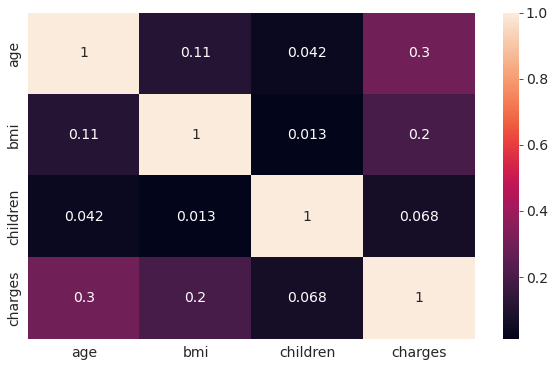

In [34]:
sns.heatmap(corr_matrix, annot = True, cbar = True)

In [36]:
smoker_values = {"no":0, "yes":1}
smoker_numeric = medical_df.smoker.map(smoker_values)


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [37]:
corr_matrix = medical_df.corr()
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


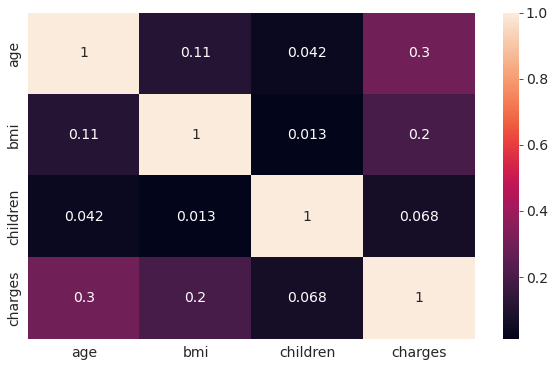

In [38]:
sns.heatmap(corr_matrix, annot = True, cbar = True)

In [40]:
nonsmoker_df = medical_df[medical_df.smoker == "no"]
print(nonsmoker_df)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


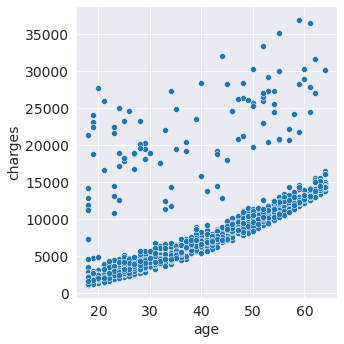

In [41]:
sns.relplot(x = "age", y = "charges", data = nonsmoker_df)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [52]:
inputs = nonsmoker_df[["age"]]
target = nonsmoker_df["charges"]


print("Shape of input", inputs.shape)
print("Shape of targets", target.shape)

Shape of input (1064, 1)
Shape of targets (1064,)


In [54]:
model.fit(inputs, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
test = np.array([[45],[32],[23]])
model.predict(test)

array([9934.78052084, 6460.54465403, 4055.30443855])

In [58]:
all_predictions = model.predict(inputs)
print(all_predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [59]:
model.coef_

array([267.24891283])

In [61]:
model.intercept_

-2091.4205565650864

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(target, all_predictions)

21738960.023917634

In [75]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [76]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [77]:
enc.transform([["northeast"]]).toarray()


array([[1., 0., 0., 0.]])

In [79]:
enc.transform([["northwest"]]).toarray()

array([[0., 1., 0., 0.]])

In [81]:
onehot = enc.transform(medical_df[["region"]]).toarray()

In [82]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = onehot

In [83]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0


In [93]:
from sklearn import preprocessing
sex_enc = preprocessing.OneHotEncoder()
sex_enc.fit(medical_df[["sex"]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [94]:
sex_enc.categories_

[array(['female', 'male'], dtype=object)]

In [95]:
sex_encoding = sex_enc.transform(medical_df[["sex"]]).toarray()

In [96]:
medical_df[["female", "male"]] = sex_encoding

In [97]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_numeric,male,female
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0,0.0,1.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0,0.0,1.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0,0.0,1.0


In [85]:
medical_df["smoker_numeric"] = smoker_numeric

In [98]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_numeric,male,female
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0,0.0,1.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0,0.0,1.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0,0.0,1.0


In [100]:
medical_df = medical_df.drop(["sex", "smoker", "region"], axis = 1)


In [102]:
medical_df

,age,bmi,children,charges,northeast,northwest,southeast,southwest,smoker_numeric,male,female
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,1,0.0,1.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,0,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0.0,1.0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0.0,1.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0.0,1.0


In [110]:
input_cols = list(medical_df.columns)
input_cols.remove("charges")
print(input_cols)

['age', 'bmi', 'children', 'northeast', 'northwest', 'southeast', 'southwest', 'smoker_numeric', 'male', 'female']


In [113]:
X = medical_df[input_cols]
X

,age,bmi,children,northeast,northwest,southeast,southwest,smoker_numeric,male,female
0,19,27.900,0,0.0,0.0,0.0,1.0,1,0.0,1.0
1,18,33.770,1,0.0,0.0,1.0,0.0,0,1.0,0.0
2,28,33.000,3,0.0,0.0,1.0,0.0,0,1.0,0.0
3,33,22.705,0,0.0,1.0,0.0,0.0,0,1.0,0.0
4,32,28.880,0,0.0,1.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,0.0,0.0,0,1.0,0.0
1334,18,31.920,0,1.0,0.0,0.0,0.0,0,0.0,1.0
1335,18,36.850,0,0.0,0.0,1.0,0.0,0,0.0,1.0
1336,21,25.800,0,0.0,0.0,0.0,1.0,0,0.0,1.0


In [115]:
y = medical_df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [117]:
X.shape

(1338, 10)

In [118]:
y.shape

(1338,)

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
test = np.array(X.iloc[0])
test.reshape(1, -1) 

array([[19. , 27.9,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  1. ]])

In [131]:
model.predict([[19. , 27.9,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  1. ]])

array([25293.7130284])

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [134]:
numeric_cols = ["age", "bmi", "children"]

In [136]:
scaler.fit(medical_df[numeric_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [138]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [140]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [141]:
medical_df.columns

Index(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest',
       'southeast', 'southwest', 'smoker_numeric', 'male', 'female'],
      dtype='object')

In [143]:
cat_cols = ['northeast', 'northwest','southeast', 'southwest', 'smoker_numeric', 'male', 'female']
categorical_data = medical_df[cat_cols].values

In [144]:
categorical_data

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [145]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)

In [146]:
print(inputs)

[[-1.43876426 -0.45332    -0.90861367 ...  1.          0.
   1.        ]
 [-1.50996545  0.5096211  -0.07876719 ...  0.          1.
   0.        ]
 [-0.79795355  0.38330685  1.58092576 ...  0.          1.
   0.        ]
 ...
 [-1.50996545  1.0148781  -0.90861367 ...  0.          0.
   1.        ]
 [-1.29636188 -0.79781341 -0.90861367 ...  0.          0.
   1.        ]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.          0.
   1.        ]]
